In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [5]:
df = pd.read_csv('nyc_citibike.csv')
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [8]:
df.shape

(72035, 18)

In [9]:
df.describe()

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000
mean,14.176775,14.372916,1.046751e+03,1535.681488,40.738587,-73.983531,1537.181287,40.738292,-73.983435,26139.737683,1977.994947,30.468522
std,4.809857,4.854897,8.139700e+03,1418.093403,0.029777,0.018456,1420.198780,0.029736,0.018639,5793.540983,11.868175,17.341855
min,0.000000,0.000000,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,1.000000
25%,10.000000,10.000000,3.980000e+02,382.000000,40.718939,-73.995481,382.000000,40.718939,-73.995299,20533.000000,1969.000000,15.000000
50%,15.000000,15.000000,6.810000e+02,504.000000,40.740343,-73.986580,503.000000,40.739974,-73.986580,27840.000000,1980.000000,30.000000
75%,18.000000,18.000000,1.201000e+03,3223.000000,40.758997,-73.973747,3224.000000,40.758924,-73.973747,30995.000000,1988.000000,46.000000
max,23.000000,23.000000,1.344462e+06,3680.000000,40.814394,-73.907744,3680.000000,40.814394,-73.907744,33671.000000,2002.000000,60.000000


In [12]:
df.isnull().sum().to_frame('nan_count')

,nan_count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


In [18]:
# (df.isnull().sum() / len(df)).to_frame('nan_ratio')

pd.DataFrame(data=df.isnull().sum()/len(df), columns=['nan_ratio'])

,nan_ratio
start_date,0.0
end_date,0.0
start_hour,0.0
end_hour,0.0
trip_duration,0.0
start_station_id,0.0
start_station_name,0.0
start_station_latitude,0.0
start_station_longitude,0.0
end_station_id,0.0


In [19]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

In [22]:
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

In [23]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

In [24]:
df['trip_duration_min'] = df['trip_duration'] / 60
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,trip_duration_min
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36,6.500000
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29,14.233333
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55,8.766667
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32,14.750000
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34,5.400000


In [25]:
df['trip_duration_min'].describe()

count    72035.000000
mean        17.445851
std        135.661662
min          1.016667
25%          6.633333
50%         11.350000
75%         20.016667
max      22407.700000
Name: trip_duration_min, dtype: float64

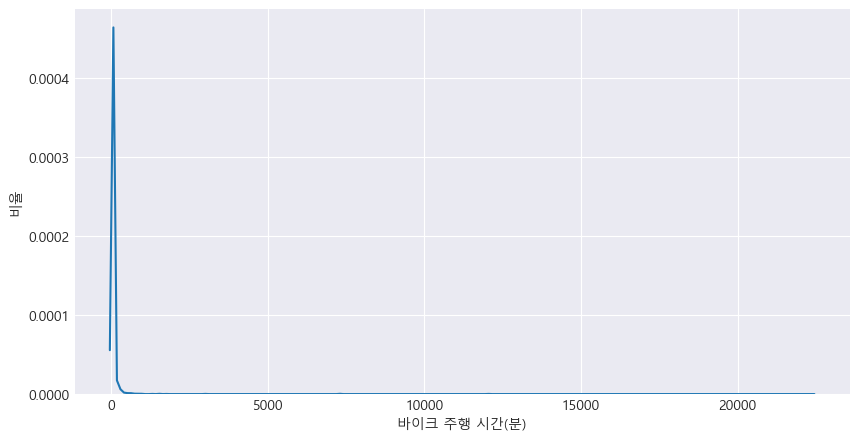

In [26]:
plt.figure(figsize=(10, 5))

kde = sns.kdeplot(df['trip_duration_min'])
kde.set_xlabel('바이크 주행 시간(분)')
kde.set_ylabel('비율')

plt.show()

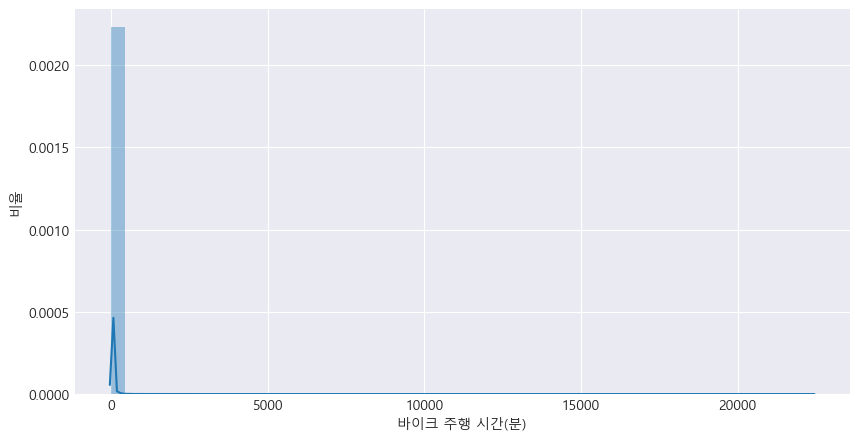

In [27]:
plt.figure(figsize=(10, 5))
dist = sns.distplot(df['trip_duration_min'])
dist.set_xlabel('바이크 주행 시간(분)')
dist.set_ylabel('비율')
plt.show()

In [29]:
print('Skewness: %f' % df['trip_duration_min'].skew())
print('Kurtosis: %f' % df['trip_duration_min'].kurt())

Skewness: 116.002624
Kurtosis: 15913.196644


In [31]:
cut_point = df['trip_duration_min'].quantile(0.99)
df_cut = df[df['trip_duration_min'] < cut_point]

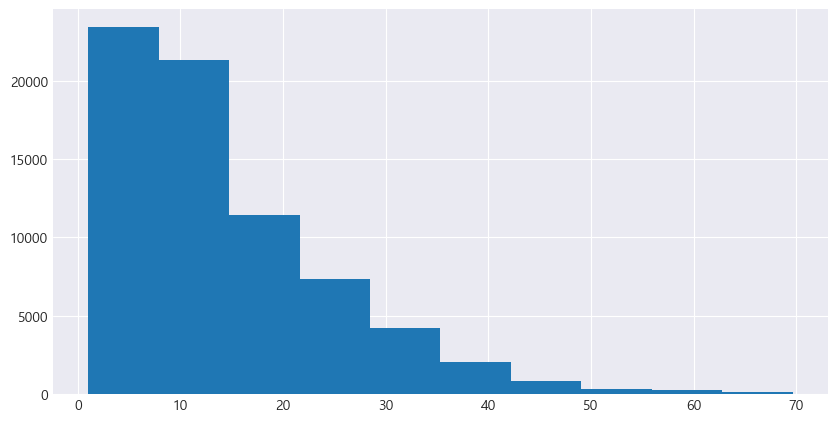

In [32]:
plt.figure(figsize=(10, 5))
df_cut['trip_duration_min'].hist()
plt.show()

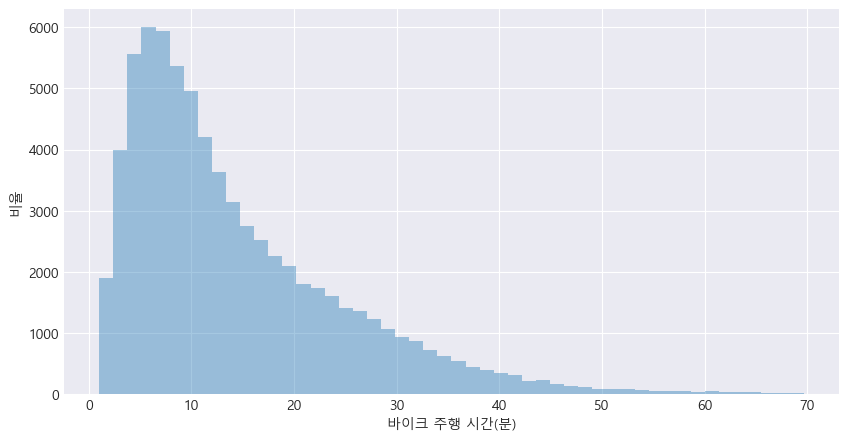

In [34]:
plt.figure(figsize=(10, 5))
dist = sns.distplot(df_cut['trip_duration_min'], kde=False)
dist.set_xlabel('바이크 주행 시간(분)')
dist.set_ylabel('비율')
plt.show()

In [37]:
print('skewness: %f' % df_cut['trip_duration_min'].skew())
print('Kurtosis: %f' % df_cut['trip_duration_min'].kurt())

skewness: 1.418011
Kurtosis: 2.307984


In [38]:
df_cut['start_hour'].value_counts()

18    8171
17    7954
8     6640
19    5576
16    4687
9     4265
7     3971
20    3624
15    3544
14    3398
13    3210
12    3109
11    2763
10    2640
21    2374
6     1855
22    1574
23     918
5      476
0      235
1      110
2       77
4       77
3       66
Name: start_hour, dtype: int64

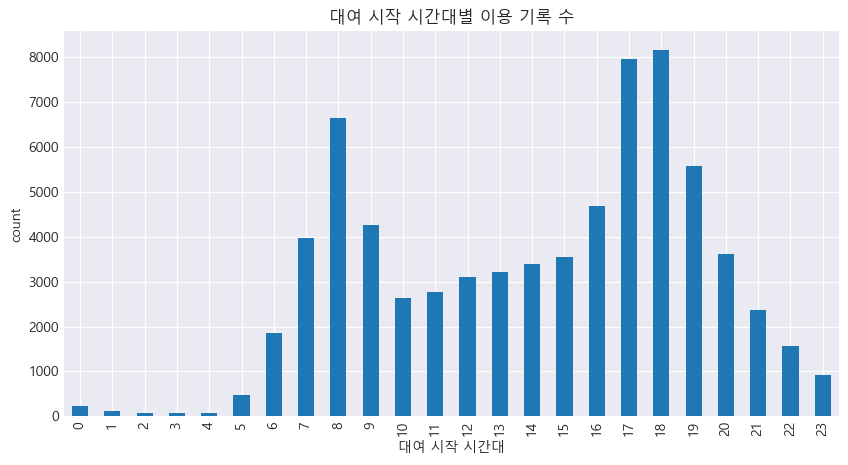

In [41]:
plt.figure(figsize=(10, 5))
df_cut['start_hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show()

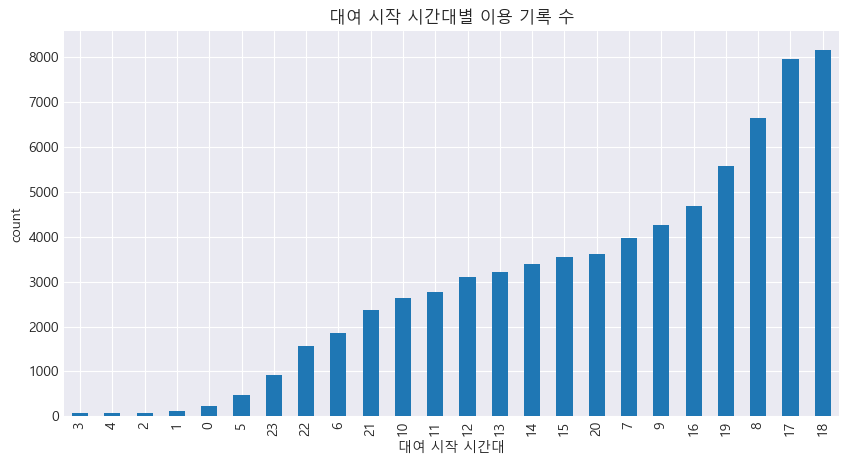

In [44]:
plt.figure(figsize=(10, 5))
df_cut['start_hour'].value_counts(ascending=True).plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show()

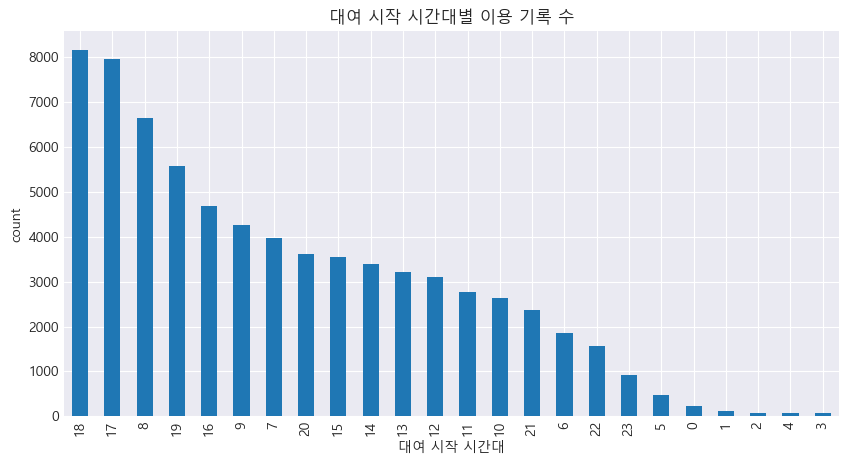

In [45]:
plt.figure(figsize=(10, 5))
df_cut['start_hour'].value_counts().plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show()

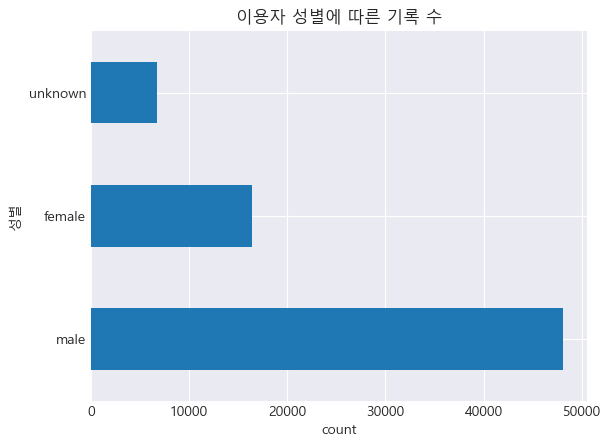

In [46]:
plt.figure()
df_cut['gender'].value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('성별')
plt.title('이용자 성별에 따른 기록 수')
plt.show()

In [48]:
df_cut['start_station_name'].value_counts().nlargest(10)

Pershing Square North    749
West St & Chambers St    504
Broadway & E 22 St       501
W 21 St & 6 Ave          468
8 Ave & W 33 St          443
E 17 St & Broadway       442
E 47 St & Park Ave       441
W 41 St & 8 Ave          436
W 22 St & 10 Ave         431
W 38 St & 8 Ave          407
Name: start_station_name, dtype: int64

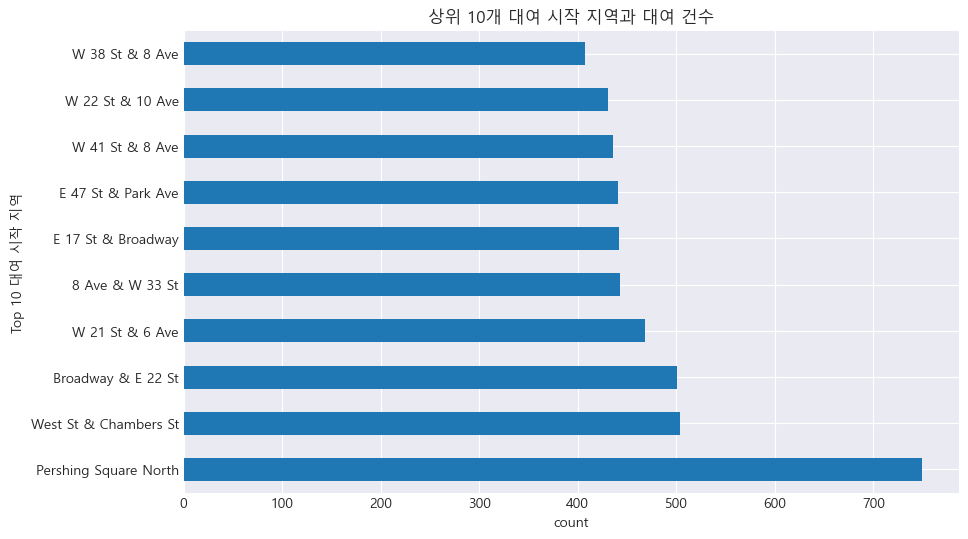

In [55]:
plt.figure(figsize=(10, 6))
df_cut['start_station_name'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Top 10 대여 시작 지역')
plt.title('상위 10개 대여 시작 지역과 대여 건수')
plt.show()

<Figure size 1000x500 with 0 Axes>

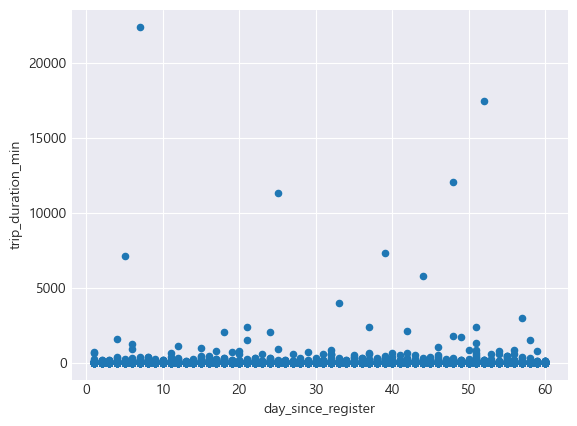

In [56]:
plt.figure(figsize=(10, 5))
df.plot.scatter(x='day_since_register', y='trip_duration_min')
plt.show()

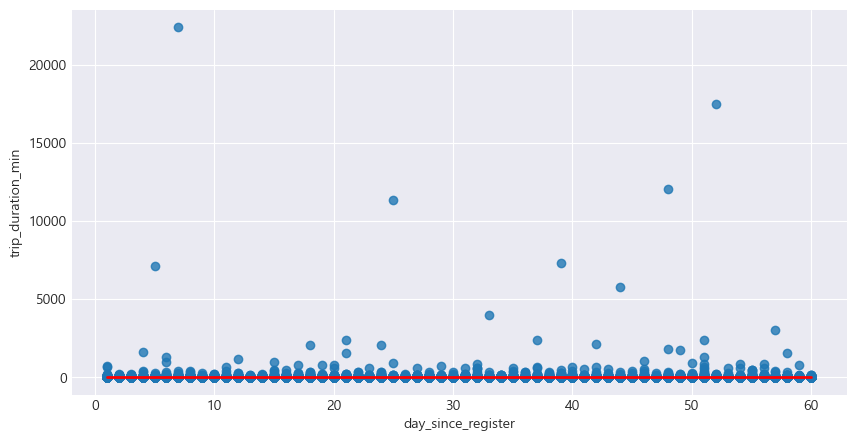

In [60]:
plt.figure(figsize=(10, 5))
reg = sns.regplot(x='day_since_register', y='trip_duration_min', data=df, line_kws={'color':'red', 'lw':2})
plt.show()

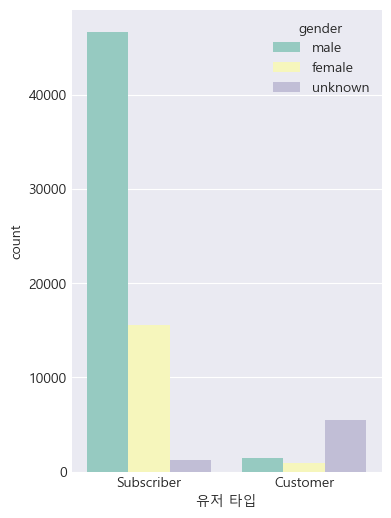

In [61]:
plt.figure(figsize=(4, 6))
cnt = sns.countplot(x='usertype', hue='gender', data=df_cut, palette='Set3')
cnt.set_xlabel('유저 타입')
cnt.set_ylabel('count')
plt.show()

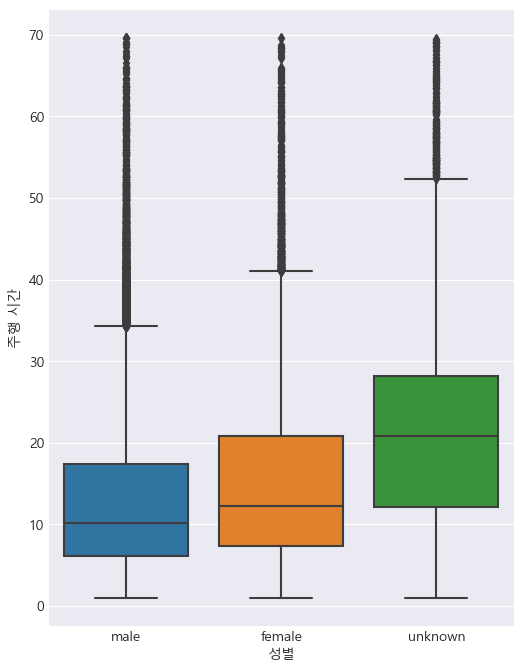

In [62]:
plt.figure(figsize=(6, 8))
box = sns.boxplot(x='gender', y='trip_duration_min', data=df_cut)
box.set_xlabel('성별')
box.set_ylabel('주행 시간')
plt.show()

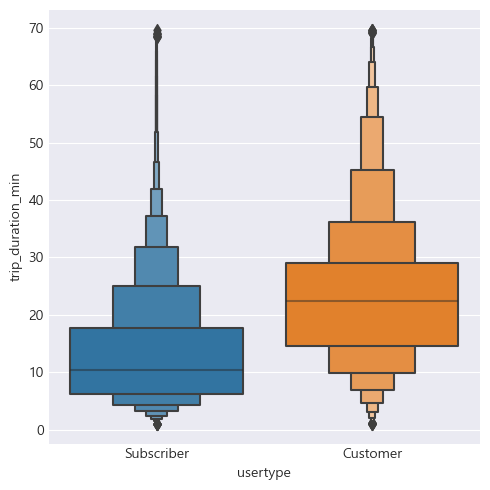

In [64]:
sns.catplot(x='usertype', y='trip_duration_min', data=df_cut, kind='boxen')
plt.show()

In [66]:
top_list = df_cut['start_station_name'].value_counts().nlargest(10).index
df_top = df_cut[df_cut['start_station_name'].isin(top_list)]

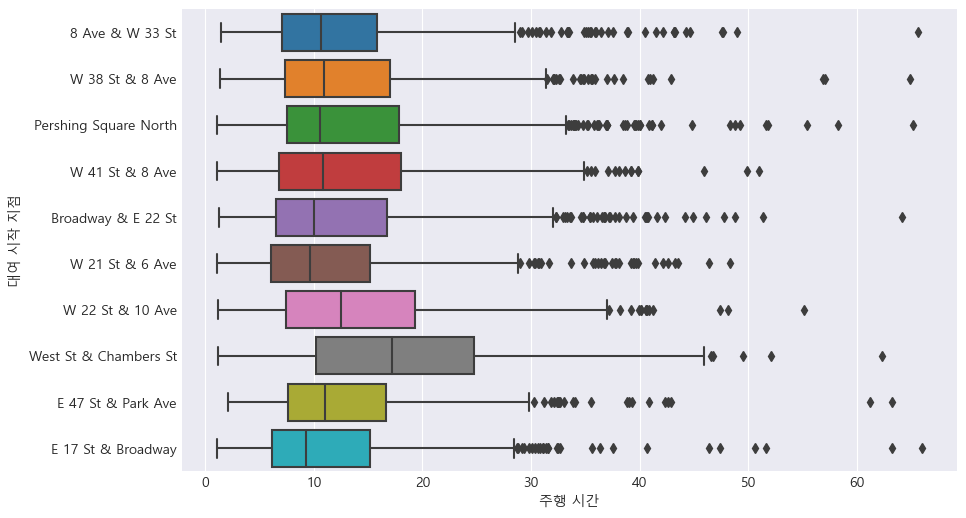

In [67]:
plt.figure(figsize=(10, 6))
box = sns.boxplot(x='trip_duration_min', y='start_station_name', data=df_top)
box.set_xlabel('주행 시간')
box.set_ylabel('대여 시작 지점')
plt.show()

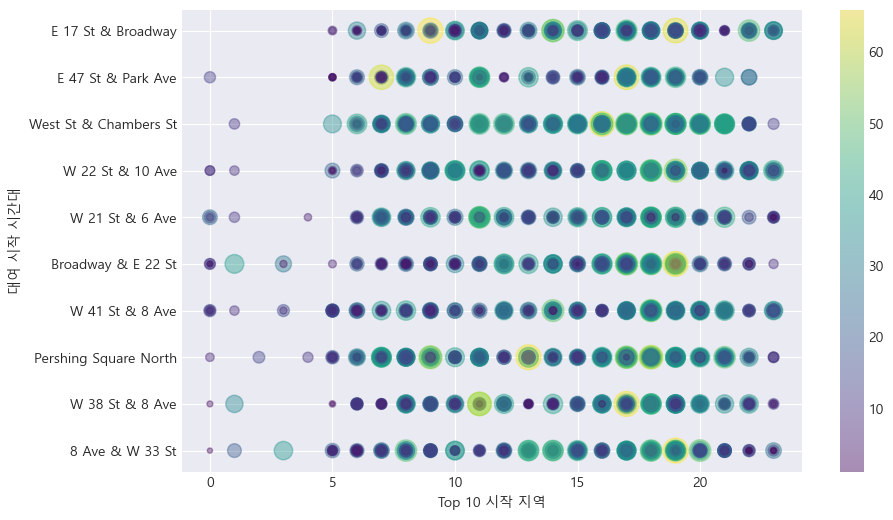

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(x='start_hour',
            y='start_station_name',
            s=df_top['trip_duration_min']*5,
            c='trip_duration_min',
            cmap='viridis',
            alpha=0.4,
            data=df_top)
plt.colorbar()
plt.xlabel('Top 10 시작 지역')
plt.ylabel('대여 시작 시간대')
plt.show()

In [69]:
df_top['start_hour']

6         3
33        1
50        4
103       2
114       3
         ..
71989    23
71999    22
72001    23
72020    23
72025    23
Name: start_hour, Length: 4822, dtype: int64

In [77]:
base = df_top.groupby(['start_station_name', 'start_hour'])['bike_id'].count().unstack()
base

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_station_name,,,,,,,,,,,,,,,,,,,,,
8 Ave & W 33 St,1.0,1.0,NaN,1.0,NaN,12.0,23.0,21.0,45.0,34.0,...,9.0,19.0,23.0,53.0,53.0,48.0,17.0,21.0,15.0,5.0
Broadway & E 22 St,5.0,1.0,NaN,2.0,NaN,1.0,5.0,9.0,32.0,16.0,...,26.0,20.0,30.0,74.0,133.0,67.0,15.0,8.0,6.0,1.0
E 17 St & Broadway,NaN,NaN,NaN,NaN,NaN,2.0,7.0,11.0,17.0,26.0,...,30.0,21.0,36.0,56.0,54.0,41.0,28.0,7.0,16.0,9.0
E 47 St & Park Ave,1.0,NaN,NaN,NaN,NaN,5.0,11.0,36.0,34.0,14.0,...,6.0,12.0,34.0,116.0,97.0,30.0,8.0,1.0,2.0,NaN
Pershing Square North,1.0,NaN,1.0,NaN,1.0,6.0,9.0,57.0,99.0,72.0,...,17.0,27.0,39.0,100.0,128.0,62.0,20.0,18.0,9.0,3.0
W 21 St & 6 Ave,3.0,1.0,NaN,NaN,1.0,NaN,9.0,22.0,30.0,29.0,...,17.0,23.0,30.0,46.0,71.0,34.0,20.0,22.0,2.0,8.0
W 22 St & 10 Ave,2.0,1.0,NaN,NaN,NaN,4.0,3.0,20.0,35.0,32.0,...,19.0,13.0,34.0,30.0,65.0,28.0,29.0,23.0,26.0,8.0
W 38 St & 8 Ave,1.0,1.0,NaN,NaN,NaN,2.0,20.0,8.0,37.0,42.0,...,18.0,17.0,17.0,53.0,61.0,43.0,11.0,10.0,9.0,4.0
W 41 St & 8 Ave,5.0,1.0,NaN,2.0,NaN,38.0,29.0,10.0,21.0,31.0,...,16.0,14.0,11.0,51.0,76.0,42.0,25.0,16.0,7.0,7.0


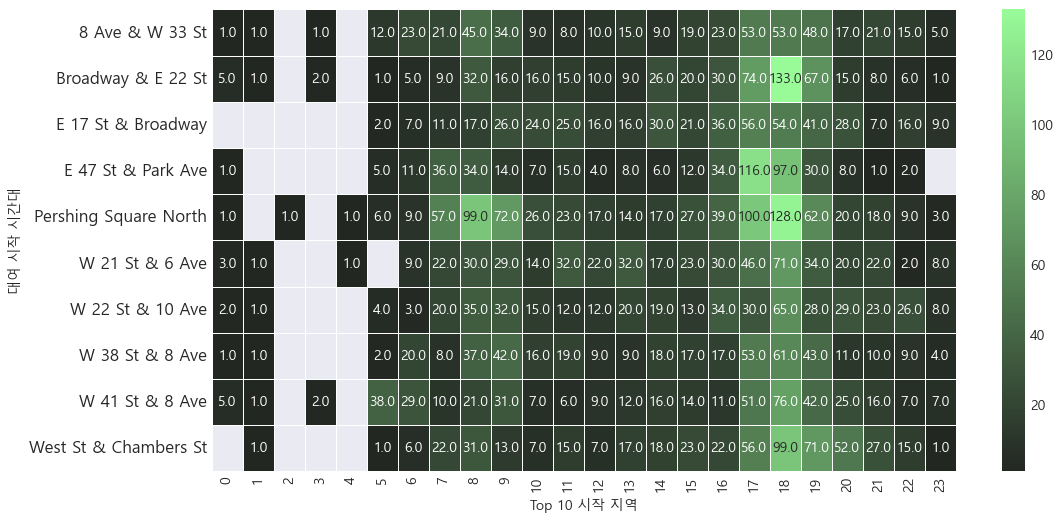

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))
pal = sns. dark_palette('palegreen', as_cmap=True)
sns.heatmap(base,
            cmap=pal,
            annot=True,
            fmt='.1f',
            linewidths=.5,
            ax=ax)
plt.xlabel('Top 10 시작 지역')
plt.ylabel('대여 시작 시간대')
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.show()

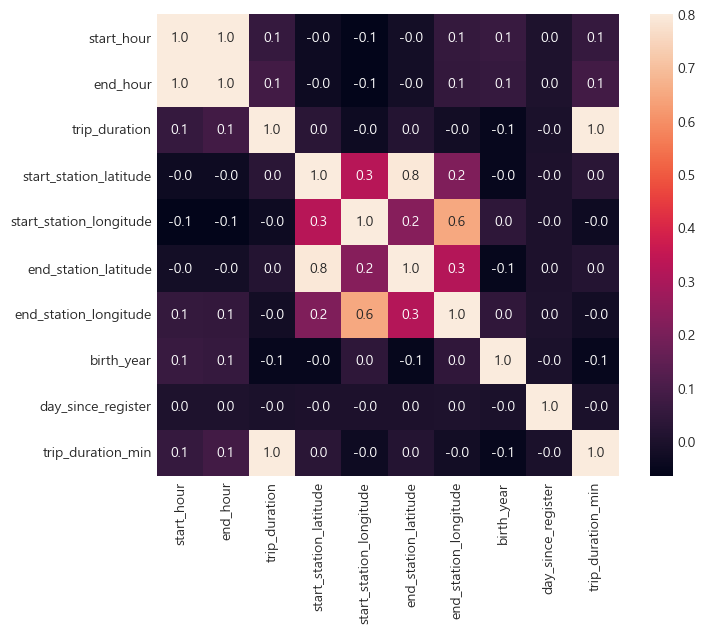

In [83]:
def draw_corrmat(df):
    y_corrmat = df.corr()
    f, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(y_corrmat, vmax=.8, fmt='.1f', annot=True, square=True, ax=ax)
    
draw_corrmat(df_cut)